<a href="https://colab.research.google.com/github/yousefsersy/Project-2/blob/brigette-branch/Project2Group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf

In [ ]:
# Step 1: Data Collection and Preprocessing
# Collect historical data for S&P 500 and currency exchange rates
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

In [ ]:
# Define the time period for the data
assets = ['EURUSD=X', '^GSPC', 'JPY=X']
data = yf.download(assets, start='2010-01-01', end='2023-12-31')
data = data.ffill()

# Fetch data for S&P 500 and currency exchange rates
data['EURUSD_Return'] = data['Adj Close']['EURUSD=X'].pct_change()
data['SP500_Return'] = data['Adj Close']['^GSPC'].pct_change()
data['JPY_Return'] = data['Adj Close']['JPY=X'].pct_change()

#Set the short & long window
data['EURUSD_MA50'] = data['Adj Close']['EURUSD=X'].rolling(window=50).mean()
data['EURUSD_MA200'] = data['Adj Close']['EURUSD=X'].rolling(window=200).mean()
data['SP500_MA50'] = data['Adj Close']['^GSPC'].rolling(window=50).mean()
data['SP500_MA200'] = data['Adj Close']['^GSPC'].rolling(window=200).mean()
data['JPY_MA50'] = data['Adj Close']['JPY=X'].rolling(window=50).mean()
data['JPY_MA200'] = data['Adj Close']['JPY=X'].rolling(window=200).mean()

# Drop nulls
data = data.dropna()
features = [
    'EURUSD_Return', 'EURUSD_MA50', 'EURUSD_MA200',
    'SP500_Return', 'SP500_MA50', 'SP500_MA200',
    'JPY_Return', 'JPY_MA50', 'JPY_MA200'
]
target = 'EURUSD_Return'






[*********************100%%**********************]  3 of 3 completed


In [ ]:
#Initialize the new signal for each exchange

data['EURUSD_Return']

Date
2010-10-08    0.000571
2010-10-11    0.003564
2010-10-12   -0.006968
2010-10-13    0.002644
2010-10-14    0.003618
                ...   
2023-12-25    0.001852
2023-12-26   -0.000573
2023-12-27    0.002065
2023-12-28    0.005943
2023-12-29   -0.003641
Freq: B, Name: EURUSD_Return, Length: 3451, dtype: float64

In [ ]:
#Train the model

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Linear Regression MSE: 1.2129285097506462e-32
Linear Regression R2: 1.0
Random Forest MSE: 1.4832275175289599e-08
Random Forest R2: 0.9995020868636854


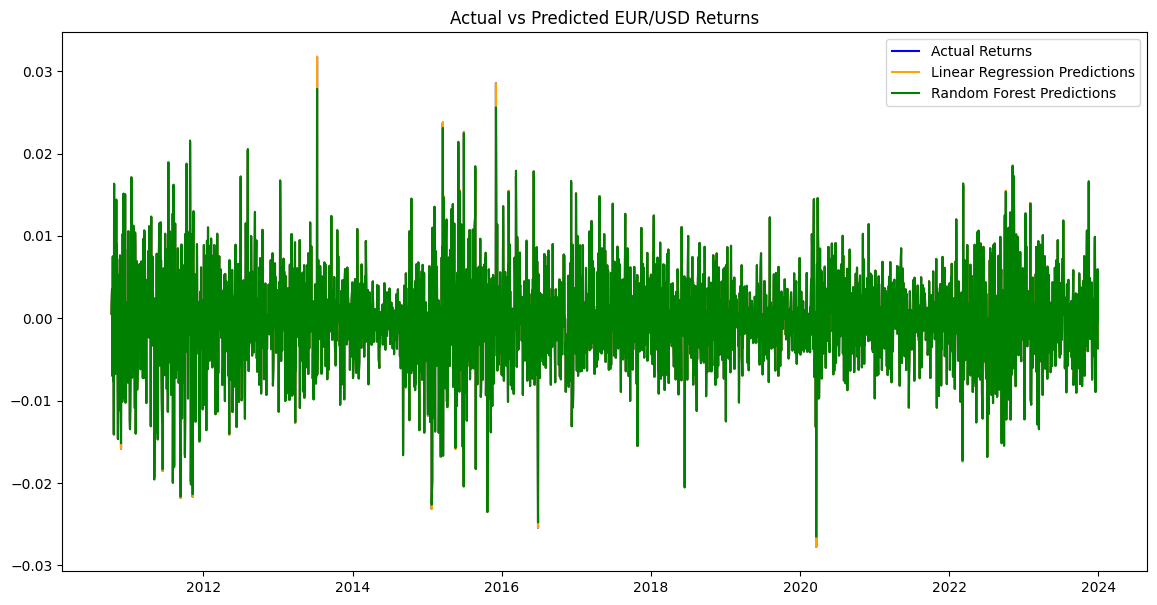

In [ ]:
#Prediction and Visualization

future_returns_lr = lr_model.predict(X)
future_returns_rf = rf_model.predict(X)
data['LR_Predictions'] = future_returns_lr
data['RF_Predictions'] = future_returns_rf
plt.figure(figsize=(14, 7))
plt.plot(data.index, data[target], label='Actual Returns', color='blue')
plt.plot(data.index, data['LR_Predictions'], label='Linear Regression Predictions', color='orange')
plt.plot(data.index, data['RF_Predictions'], label='Random Forest Predictions', color='green')
plt.legend()
plt.title('Actual vs Predicted EUR/USD Returns')
plt.show()

In [ ]:
# Step 3: Model Development
# Prepare the data for modeling
X = data[['S&P 500', 'USD Index']]
y_eur_usd = data['EUR/USD']
y_jpy_usd = data['JPY/USD']
y_usd_index = data['USD Index']

# Reshape the target variables
y_usd = y_eur_usd.values.reshape(-1, 1)
y_yen = y_jpy_usd.values.reshape(-1, 1)
y_euro = y_eur_usd.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_eur_usd_train, y_eur_usd_test = train_test_split(X, y_eur_usd, test_size=0.2, random_state=42)
X_train, X_test, y_jpy_usd_train, y_jpy_usd_test = train_test_split(X, y_jpy_usd, test_size=0.2, random_state=42)
X_train, X_test, y_usd_index_train, y_usd_index_test = train_test_split(X, y_usd_index, test_size=0.2, random_state=42)

# Linear Regression model
lr_model_eur_usd = LinearRegression()
lr_model_eur_usd.fit(X_train, y_eur_usd_train)
y_eur_usd_pred_lr = lr_model_eur_usd.predict(X_test)

lr_model_jpy_usd = LinearRegression()
lr_model_jpy_usd.fit(X_train, y_jpy_usd_train)
y_jpy_usd_pred_lr = lr_model_jpy_usd.predict(X_test)

lr_model_usd_index = LinearRegression()
lr_model_usd_index.fit(X_train, y_usd_index_train)
y_usd_index_pred_lr = lr_model_usd_index.predict(X_test)


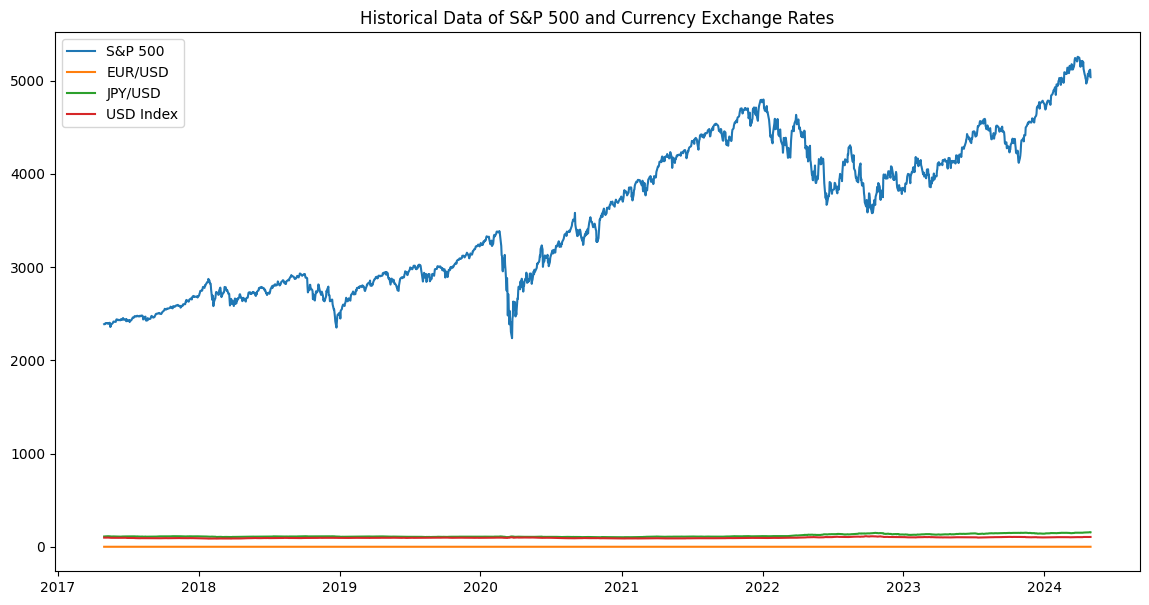

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)

# Plotting historical data
plt.figure(figsize=(14, 7))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.legend()
plt.title('Historical Data of S&P 500 and Currency Exchange Rates')
plt.show()


In [ ]:
# Random Forest Regressor model
rf_model_eur_usd = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_eur_usd.fit(X_train, y_eur_usd_train)
y_eur_usd_pred_rf = rf_model_eur_usd.predict(X_test)

rf_model_jpy_usd = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_jpy_usd.fit(X_train, y_jpy_usd_train)
y_jpy_usd_pred_rf = rf_model_jpy_usd.predict(X_test)


In [ ]:
#Reference Module 14 - Buy/sell signals

signals_df = pd.concat([y_eur_usd, y_jpy_usd, X], axis=1)

#['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()



,EUR/USD,JPY/USD,S&P 500,USD Index
Date,,,,
2017-05-01,1.090750,111.302002,2388.330078,99.139999
2017-05-02,1.090893,111.811996,2391.169922,98.980003
2017-05-03,1.093565,111.969002,2388.129883,99.209999
2017-05-04,1.088898,112.782997,2389.520020,98.760002
2017-05-05,1.098153,112.537003,2399.290039,98.650002


In [ ]:
# Step 4: Backtesting and Validation
# Evaluate the models
def evaluate_model(y_test, y_pred, model_name): # Add model_name as a parameter
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} Model Performance:')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'R-squared: {r2}\n')

# Plot residuals (commented out for now)
  #residuals = y_test - y_pred
  #plt.figure(figsize=(10, 6))
  #sns.histplot(residuals, kde=True)
  #plt.title(f'{model_name} Residuals')
  #plt.xlabel('Residuals')
  #plt.ylabel('Frequency')
  #plt.show()



In [ ]:
# Evaluate Linear Regression models
evaluate_model(y_eur_usd_test, y_eur_usd_pred_lr, 'Linear Regression (EUR/USD)')
evaluate_model(y_jpy_usd_test, y_jpy_usd_pred_lr, 'Linear Regression (JPY/USD)')

# Evaluate Random Forest Regressor models
evaluate_model(y_eur_usd_test, y_eur_usd_pred_rf, 'Random Forest (EUR/USD)')
evaluate_model(y_jpy_usd_test, y_jpy_usd_pred_rf, 'Random Forest (JPY/USD)')

Linear Regression (EUR/USD) Model Performance:
Mean Absolute Error: 0.011463735729705044
Root Mean Squared Error: 0.013590585884262619
R-squared: 0.942553926509297

Linear Regression (JPY/USD) Model Performance:
Mean Absolute Error: 5.329447884304199
Root Mean Squared Error: 6.272304357555432
R-squared: 0.8216909317577392

Random Forest (EUR/USD) Model Performance:
Mean Absolute Error: 0.005247109530662949
Root Mean Squared Error: 0.006991296553317688
R-squared: 0.9847980451224186

Random Forest (JPY/USD) Model Performance:
Mean Absolute Error: 1.2437588407776572
Root Mean Squared Error: 2.0629070859100618
R-squared: 0.9807123854648684



In [ ]:
# Step 5: Integration with Trading Systems
# Placeholder for code


# Step 6: Monitoring and Optimization
# Placeholder for code
